## Sentiment Analysis of Product Review Dataset

Sentiment analysis, a branch of natural language processing, involves the use of algorithms to determine the emotional tone behind a piece of text. By analyzing keywords, context, and linguistic patterns, sentiment analysis can identify whether the sentiment expressed is positive, negative, or neutral. This powerful tool finds widespread application in social media monitoring, customer feedback analysis, and market research. Understanding public sentiment enables businesses to gauge their reputation, improve customer experiences, and make data-driven decisions. While not flawless, sentiment analysis continues to evolve, integrating machine learning and AI advancements to better comprehend complex human emotions

### Problem Statement:

Problem Statement: Our Product review dataset consists of 560000+ product reviews along with their score. Our aim is to build a model that will classify the review provided as positive or negative.

In [2]:
#Importing necessary Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [4]:
# Reading in dataset
df = pd.read_csv('Reviews.csv')

#Structure of the dataframe
print(df.shape)
df = df.head(500)
print(df.shape) 
df.head()

(568454, 10)
(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### Exploratory Data Analysis of the Data Set

In [5]:
print('Dataframe information')
print(df.info())


Dataframe information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None


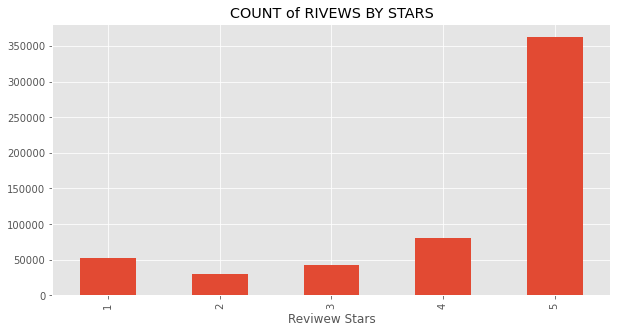

In [6]:
# visualizing dataset
ax= df['Score'].value_counts().sort_index()\
      .plot(kind = 'bar',
      title ='COUNT of RIVEWS BY STARS',figsize = (10,5))
ax.set_xlabel('Reviwew Stars')
plt.show()

***basic NLP***

In [7]:
# make sentiment label based on scores
data = df
def label_sentiment(Score):
    if Score <= 2:
        return 'negative'
    elif Score == 3:
        return 'neutral'
    elif Score >= 4:
        return 'positive'
    

# Assuming 'data' is your DataFrame with 'review' and 'rating' columns
data['sentiment'] = data['Score'].apply(label_sentiment)
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive


##### Cleaning the texts

In [8]:
# Cleaning the texts
import re
from nltk.stem import PorterStemmer
from  nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [10]:
ps = PorterStemmer()
wordnet = WordNetLemmatizer()
#sentence = nltk.sent_tokenize(data)   it initial in data frame forme look like tokenize
corpus = []
for i in range(len(data)):
    review = re.sub('[^a-zA-z]',' ',data['Text'][i]) #removing all spaces, numbers, special characters 
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    #data['tokenized_review']=data['tokenized_review'].append(review) 
    corpus.append(review)  

KeyboardInterrupt: 

In [43]:
# Creating the Bag of Words model
#Importing the count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()


In [44]:
# there in data , label in the form of text it is spam or ham so we nned to convert it in 0 or 1
Y = pd.get_dummies(data['sentiment']) 
#Y = data['Score']



# Access a specific column using its name
#specific_column = y['positive']  # Access the 'positive' column

# If you want to convert it to a NumPy array, you can use .values
#specific_column_array = specific_column.values

Y = Y.iloc[:,2].values # there are two column in y and just 1 column is sufficent

#### Splitting the data into training and testing sets

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.20, random_state=0)

### Multinomial Naive Bayes Classifier

In [33]:
from sklearn.naive_bayes import MultinomialNB

sentiment_analyser = MultinomialNB()
sentiment_analyser_model = sentiment_analyser.fit(x_train,y_train)
y_pred = sentiment_analyser_model.predict(x_test)


Confusion Matrix:
[[ 9 15]
 [ 3 73]]


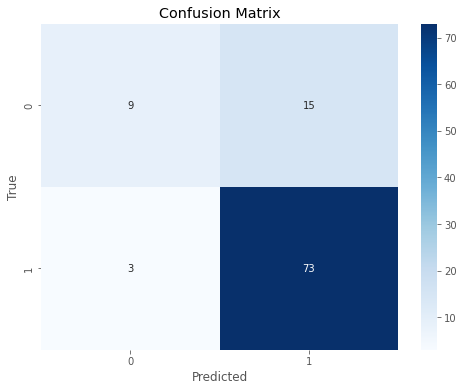

Accuracy Score :
0.82


In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
confusion_m = confusion_matrix(y_test, y_pred)
# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_m)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sentiment_analyser.classes_, yticklabels=sentiment_analyser.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
accuracy_s = accuracy_score(y_test, y_pred)
print("Accuracy Score :")
print(accuracy_s)

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform your text data
X = tfidf_vectorizer.fit_transform(corpus)


In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.20, random_state=0)

In [53]:
classifier = SVC()
SVC_classifier_model = classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_s = accuracy_score(y_test, y_predict)
print("Accuracy Score")
print(accuracy_s)
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predict)
print(report)


Accuracy Score
0.76
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.76      1.00      0.86        76

    accuracy                           0.76       100
   macro avg       0.38      0.50      0.43       100
weighted avg       0.58      0.76      0.66       100



C:\Users\Sanwariya\Downloads\ana\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanwariya\Downloads\ana\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanwariya\Downloads\ana\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Remarks:


The above model does not account for context in the sentences. Further enhancements could be made to address the issue of context between sentences. The model relies on tokenization, wherein each sentence is divided into individual words. Consequently, there is a possibility that the model might make incorrect predictions, particularly when positive words are more prevalent in negative reviews. Since the model does not take contextual cues into account, there is always a risk of erroneous predictions.

### Word2Vec Approch

#### To take into account for the contextual information ,I decided to go for Word2Vec approach

In [61]:
# Train a Word2Vec model
w2v_model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, sg=0)

# Convert text to word vectors using the trained model
def text_to_word_vector(text):
    return [w2v_model.wv[word] for word in text if word in w2v_model.wv]

corpus = corpus.apply(text_to_word_vector)




AttributeError: 'list' object has no attribute 'apply'

**Basic NLPK**

In [19]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [20]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [21]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

**VADER Seniment Scoring**

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [24]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [25]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [27]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [41]:
# Run the polarity score on the entire dataset
res = {}
for i , row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [47]:
res2=[]
for i in range(len(df)):
    text = df['Text'][i]
    myid = df['Id'][i]
    res2.append(sia.polarity_scores(text))

In [54]:
vaders2 = pd.DataFrame(res2)
vaders2 = vaders.reset_index().rename(columns ={'index':'Id'})
vaders2 = vaders.merge(df,how ='left')


In [52]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns ={'index':'Id'})
vaders = vaders.merge(df,how ='left')
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


***Plot VADER results***

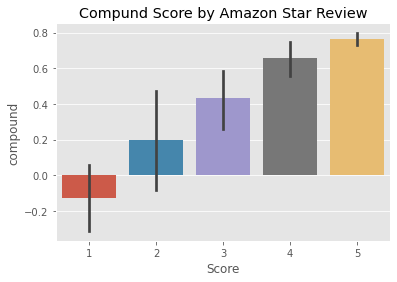

In [56]:
ax = sns.barplot(data = vaders, x ='Score',y = 'compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

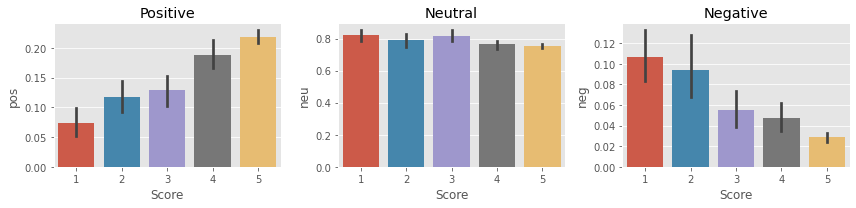

In [58]:
fig , axs = plt.subplots(1,3,figsize = (12,3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()



***Roberta Pretrained Model***

In [67]:
from transformers import AutoTokenizer
from transformers import TFAutoModelForSequenceClassification
from scipy.special import softmax

In [68]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [69]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [80]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='tf')
output = model(**encoded_text)
scores = softmax(output.logits.numpy(), axis=1)

scores_dict = {
     'roberta_neg' : scores[0,0],
     'roberta_neu' : scores[0,1],
     'roberta_pos' : scores[0,2]
}
print(scores_dict)


{'roberta_neg': 0.9763551, 'roberta_neu': 0.020687463, 'roberta_pos': 0.0029573687}


In [88]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, truncation=True, padding='max_length', max_length=512, return_tensors='tf')
    output = model(**encoded_text)
    scores = softmax(output.logits.numpy(), axis=1)

    scores_dict = {
     'roberta_neg' : scores[0,0],
     'roberta_neu' : scores[0,1],
     'roberta_pos' : scores[0,2]
     }
    return scores_dict   

In [89]:
res ={}
for i , row in tqdm(df.iterrows(), total = len(df)):
    try :
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        
        for key , value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')
        
        
        

  0%|          | 0/500 [00:00<?, ?it/s]

In [1]:
results_df = pd.DataFrame(res).T
def label_sentiment_roberta(Score):
    if Score >= 0.5:
        return 'positive'

    else :
        return 'negative'
    

# Assuming 'data' is your DataFrame with 'review' and 'rating' columns
results_df['roberta_pos'] = results_df['roberta_pos'].apply(label_sentiment_roberta)
results_df.head()

NameError: name 'pd' is not defined

In [90]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

****Compare Scores between models****

In [91]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

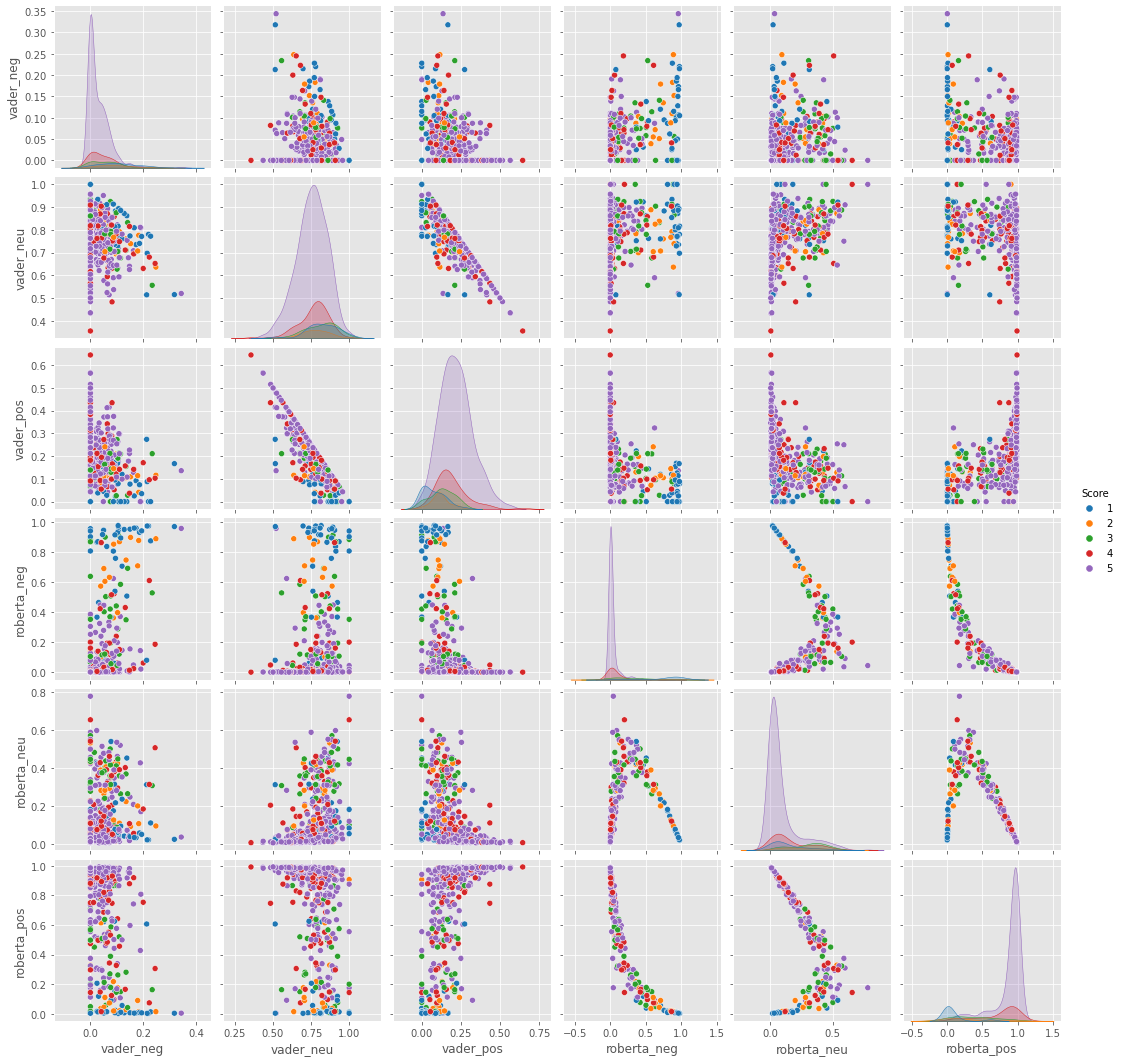

In [92]:
sns.pairplot(data = results_df , vars = ['vader_neg', 'vader_neu', 'vader_pos', 
       'roberta_neg', 'roberta_neu', 'roberta_pos',],hue ='Score',
            palette = 'tab10')
plt.show()

***Review Examples***

In [94]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [95]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [96]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [97]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'